<img src='https://coopersystem.com.br/wp-content/uploads/2020/10/blogpost-inteligencia-artificial-fatos-1024x322.png' height="100%" width="3500">

# <font color=blue|blue|red>Case Inteligência Artificial</font> 

Opa, tudo bom? Seja muito bem vindo ao Case de IA!

<ins>**_Qual será sua task:_**</ins>

"Você foi contratado como um Cientista de Dados de uma grande empresa. Logo no primeiro dia de trabalho seus superiores lhe mostraram os diversos problemas e desafios que você teria que resolver. Um deles está relacionado à uma base de dados do naufrágio do Titanic e seu objetivo seria desenvolver um modelo de Machine Learning que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input. Você logo de cara lembrou do KNN, um ótimo modelo de classificação e decidiu aplicá-lo na base de dados"

### Base de Dados:
- O nome do arquivo com a base de dados é: "titanic_data.csv"

- Abaixo estão as descrições das colunas do nosso Dataset:
    - passengerid = ID do passageiro do navio (código primário).
    - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não       sobreviveu.
    - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior       classe.
    - name = Nome do passageiro
    - sex = Gênero do passageiro, sendo masculino e feminino.
    - age = Idade do passageiro na data da ocorrência do naufrágio.
    - sibsp = Número de irmãos / cônjuges a bordo.
    - parch = Número de pais / filhos a bordo.
    - ticket = Código do ticket.
    - fare = Valor da passagem.
    - cabin = Código de identificação da Cabine.
    - embarked = Local ondem o passageiro embarcou no navio.

### Sua Estratégia:

Para não ter erro em sua entrega, você decidiu iniciar o projeto estudando um pouco mais sobre o KNN. Ao avisar seu chefe Douglas, ele lhe deu a liberdade de pesquisar por toda a internet e recomendou as seguintes fontes:

- (FEA.Dev) Machine Learning usando Python - modelo KNN (AULA PRÁTICA): https://www.youtube.com/watch?v=xL2RK0QYtHc
- StatQuest: K-nearest neighbors, Clearly Explained: https://www.youtube.com/watch?v=HVXime0nQeI
- Machine Learning na prática com o algoritmo KNN em Python: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

Além das recomendações, por ser seu primeiro projeto, Douglas resolveu lhe ajudar dando algumas dicas:

1. Explore um pouco a base de dados, entenda as colunas e qual o será o seu objetivo.


2. Faça uma análise inicial dos dados e realize um tratamento deles (se necessário).


3. Separe os dados em conjunto de treino(70%) e conjunto de test (30%)
    - Caso não saiba o que é isso, de uma googlada.


4. Crie o modelo
    - Recomendação de biblioteca: scikit-learn (o famoso sklearn)
    
    
5. Procure por métricas de avaliação do seu modelo

### Meta proposta pelo Douglas

Para ser considerado um bom modelo, Douglas colocou como meta uma precisão de pelo menos 60% no conjunto de teste (Obs: Lembre-se que a precisão do modelo no conjunto de treinamento e no conjunto de teste serão diferentes e o que Douglas está avaliando é no conjunto de teste)

### Dúvidas

Caso tenha dúvidas ou problemas no código sinta-se livre para chamar qualquer membro do grupo de estudo de IA do FEA.Dev.

### <font color=blue|blue|red>A partir de agora é o seu momento de desenvolver o modelo, Boa Sorte!</font> 

# Bibliotecas Iniciais

In [57]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [58]:
import pandas as pd
import numpy as np
from pylab import mpl, plt 
import seaborn as sns

In [59]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# Exploração dos dados

## Visão inicial

In [60]:
df = pd.read_csv("titanic_data.csv")

In [61]:
df.shape

(891, 12)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Lidar com valores nulos

In [66]:
#Detectando colunas com valores nulos
df.isna().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Há valores nulos nas colunas "Age"(Idade do passageiro na data da ocorrência do naufrágio.),"Cabine" (Código de identificação da Cabine) e "Embarked" (Local ondem o passageiro embarcou no navio)

In [67]:
#Quantidade de nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
#Proporção de nulos
(df.isna().sum()/df.shape[0]).round(2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

20% das observações sobre idade são nulas; 77% das observações da coluna "Cabin" são nulas, e a quantidade de nulos na coluna "Embarked" é insignificante 

## EDA I 

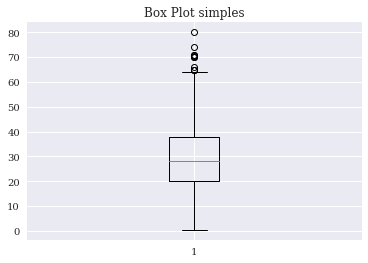

In [69]:
#Box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot simples')
ax1.boxplot(df['Age'].dropna())
plt.show()

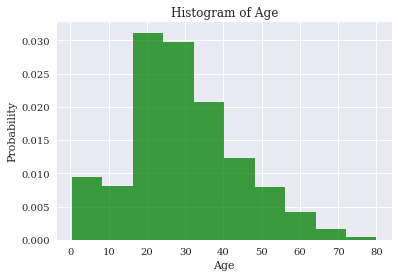

In [70]:
#Histogram
n, bins, patches = plt.hist(df['Age'].dropna(), 10, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Histogram of Age')

plt.grid(True)
plt.show()

## Limpeza de dados 

In [71]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [72]:
#retirando linhas cuja coluna Enbarked possui valor NaN, não serão significativas
df = df.dropna(axis=0, subset=["Embarked"])

In [73]:
df.shape

(889, 12)

In [74]:
#Tirar dados que não impactarão no previsão
df= df.drop(["PassengerId","Ticket",'Name',"Cabin"],axis=1)

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
## Preencher NaN da coluna Age
df = df.fillna({"Age":df["Age"].mean()})

In [77]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Features e Targets

In [78]:
df_2 = pd.get_dummies(df)

In [79]:
df_2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.642093,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [80]:
#dropnando colunas que produzem a mesma informação - Verifiquei depois e acabou enm mudando nada
df_2 = df_2.drop(["Sex_female","Embarked_S"],axis=1)

In [81]:
df_2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,22.000000,1,0,7.2500,1,0,0
1,1,1,38.000000,1,0,71.2833,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,0
4,0,3,35.000000,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0
888,0,3,29.642093,1,2,23.4500,0,0,0
889,1,1,26.000000,0,0,30.0000,1,1,0


In [82]:
X = df_2.drop("Survived",axis=1)

In [84]:
y = df_2['Survived']

## Tentativa 1 implantação do KNN (sem cross validation e sem normalizar)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [89]:
knn.score(X_test, y_test)

0.6928838951310862

In [90]:
print(confusion_matrix(y_test, y_pred))

[[135  32]
 [ 50  50]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       167
           1       0.61      0.50      0.55       100

    accuracy                           0.69       267
   macro avg       0.67      0.65      0.66       267
weighted avg       0.68      0.69      0.69       267



## Tentativa 2 implantação do KNN (n_neighbors=3,sem cross ,validation e com normalização)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [129]:
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [130]:
knn.score(X_test, y_test)

0.7940074906367042

In [131]:
print(confusion_matrix(y_test, y_pred))

[[140  27]
 [ 28  72]]


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       167
           1       0.73      0.72      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



## Tentativa 3 implantação do KNN (com cross validation e sem normalizar)

In [92]:
from sklearn.model_selection import cross_val_score

In [97]:
cv_score = cross_val_score(knn, X, y, cv=10)
print(cv_score)

[0.62921348 0.6741573  0.70786517 0.70786517 0.73033708 0.70786517
 0.75280899 0.71910112 0.66292135 0.77272727]


In [98]:
np.mean(cv_score)

0.7064862104187946

## Tentativa 3 implantação do KNN (com cross validation e com normalização)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
cv_score_2 = cross_val_score(knn, X_scaled, y, cv=10)
print(cv_score_2)

[0.76404494 0.82022472 0.73033708 0.83146067 0.84269663 0.79775281
 0.83146067 0.78651685 0.84269663 0.77272727]


In [ ]:
cv_score

## Tentativa 4.1 implantação do KNN (outras estratégias de CV e com normalização)

In [103]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [105]:
cv_score_3 = cross_val_score(knn, X_scaled, y, cv=kfold)

In [106]:
print("Cross-validation scores:\n{}".format(
cv_score_3))

Cross-validation scores:
[0.76404494 0.79213483 0.81460674 0.80337079 0.84180791]


In [108]:
print("Cross-validation scores mean:\n{}".format(
np.mean(cv_score_3)))

Cross-validation scores mean:
0.8031930425950613


## Tentativa 4.2 implantação do KNN (outras estratégias de CV e com normalização)

In [109]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(knn, X_scaled, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  889
Mean accuracy: 0.81


## Tentativa 4.3 implantação do KNN (outras estratégias de CV e com normalização)

In [112]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(knn, X_scaled, y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.80449438 0.77303371 0.78426966 0.79550562 0.80898876 0.80449438
 0.77078652 0.77752809 0.80224719 0.77303371]
Mean accuracy: 0.79
